In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/content/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
variavel = (train.isnull().sum())
print(variavel > 0)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [10]:
#na forma acima mostra em quais colunas existem valores nulos

In [11]:
print(variavel[variavel > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


In [15]:
#como notado, existem 3 colunas com valores nulos, onde foi filtrado tudo que fosse acima de 1.

In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
train.duplicated().sum()

0

In [3]:
test = pd.read_csv('/content/test.csv')

In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [17]:
test.shape

(418, 11)

In [18]:
test.duplicated().sum()

0

In [19]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [20]:
variavel1 = (test.isnull().sum())
print(variavel1[variavel1 > 0])

Age       86
Fare       1
Cabin    327
dtype: int64


In [5]:
#ideia agora é juntar tudo em um dataframe para fazer todas as modificações de uma vez.

In [22]:
titanic_completo = train.append(test, ignore_index = True)
titanic_completo

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [21]:
train_index = len(train)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
test_index = len(titanic_completo) - len(test)
test_index

891

In [24]:
titanic_completo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
titanic_completo.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [26]:
#logo de cara, tem-se que a variável alvo é "Survived"

In [27]:
titanic_completo.shape

(1309, 12)

In [28]:
titanic_completo.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [29]:
variavel2 = (titanic_completo.isnull().sum())
print(variavel2[variavel2 > 0])

Survived     418
Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64


In [30]:
#dessas 5 colunas, "survived" não precisará ser modificada, tendo em vsita que a mesma é a variável alvo.
#age é uma variável relevante, talvez seja necessário fazer algumas imputações.
#fare é a tarifa, talvez buscando uma média da classe em que o passageiro se encontra.
#cabine, pelo o que foi consultado, não ajuda muito no aspecto dos sobreviventes, pois ao todo são 1300 passageiros onde, 1014, estão com as informações da cabine ausentes.
#embarked, aqui, pode ser interessante verificar se o passageiro está sozinho ou acompanhado, assim, busca-se o local que o acompanhante embarcou

In [32]:
#a ideia agora é criar uma função para automatizar a análise de cada coluna
titanic_completo['Age'].isnull().sum()

263

In [42]:
def colunas(dataframe, coluna, count = True):
  print(f'Quantidade de valores nulos: {dataframe[coluna].isnull().sum()}')
  print(f'Valores únicos: {dataframe[coluna].unique()}')
  print(f'Quantidade de valores únicos: {dataframe[coluna].nunique()}')
  print(f'Proporção por valores únicos: {dataframe[coluna].value_counts()}')

  if count == True:
    sns.countplot(data = dataframe, x = coluna, hue = "Survived")
  else:
    sns.displot(dataframe[coluna], hue = 'Survived')

In [44]:
titanic_completo.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Quantidade de valores nulos: 418
Valores únicos: [ 0.  1. nan]
Quantidade de valores únicos: 2
Proporção por valores únicos: 0.0    549
1.0    342
Name: Survived, dtype: int64


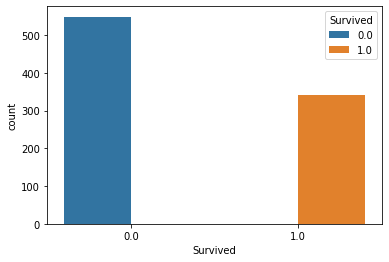

In [45]:
colunas(titanic_completo, 'Survived')

In [46]:
#fazendo o primeito teste com survived, são 418 nulos (todos que serã objeto da predição)
#com valores únicos de 0 e 1, sendo 0 não sobrevivente e, 1, sobrevivente
#portanto com apenas 2 valores unicos.
#numa proporção de 549 sendo 0, ou seja, que morreram no naufrágio e , 342 que sobreviveram.

Quantidade de valores nulos: 0
Valores únicos: [3 1 2]
Quantidade de valores únicos: 3
Proporção por valores únicos: 3    709
1    323
2    277
Name: Pclass, dtype: int64


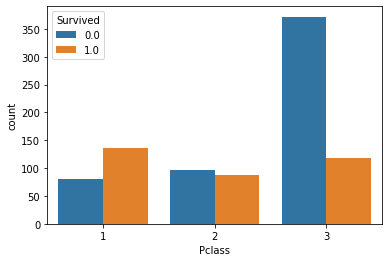

In [47]:
colunas(titanic_completo, 'Pclass')

In [48]:
#em "Pclass" não possui valores nulos, que seguindo a documentação do desafio faz referência a classe embarcada
#com valores únicos sendo restritos em 3: (1, 2, 3)
#onde 709 são da 3 classe, 277 da segunda classe e, 323 da primeira classe.
#examinando o gráfico, registra-se que a terceira classe concentrou muitas mortes, enquanto a segunda a relação sobreviventes/não sobreviventes ficou parelha
# e para a primeira classe, a maioria sobreviveu.

Quantidade de valores nulos: 0
Valores únicos: ['male' 'female']
Quantidade de valores únicos: 2
Proporção por valores únicos: male      843
female    466
Name: Sex, dtype: int64


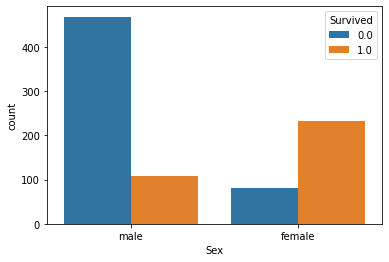

In [49]:
colunas(titanic_completo, "Sex")

In [50]:
#sem valores nulos
#existem apenas 2 opções: male e female
#numa proporção de 843 são homens e 466, são mulheres.
#em relação ao gráfico, a maioria esmagadora dos homenes faleceram, enquanto boa parte das mulheres sobreviveram.

Quantidade de valores nulos: 263
Valores únicos: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]
Quantidade de valores únicos: 98
Proporção por valores únicos: 24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64


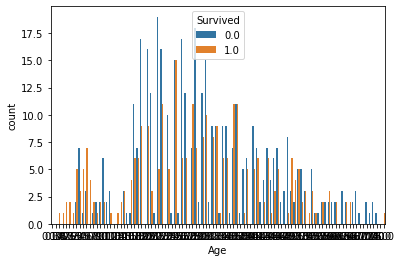

In [52]:
colunas(titanic_completo, "Age")

In [53]:
#existem 263 valores nulos;
#possuindo 98 valores únicos.

Quantidade de valores nulos: 0
Valores únicos: [1 0 3 4 2 5 8]
Quantidade de valores únicos: 7
Proporção por valores únicos: 0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


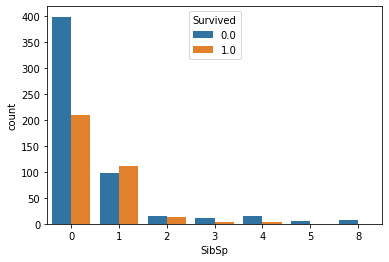

In [54]:
colunas(titanic_completo, 'SibSp')

In [56]:
#SibSp, conjunto de informações que define as relações familiares: irmão, irmã, meio-irmão, meia-irmã; Cônjuge = marido, esposa
#sem valores nulos, com  7 possibilidades de respostas: 0, 1, 2, 3, 4, 5, 8
#com maioria viajando sozinho (0), e o segundo maior grupo com resposta 1
#maioria que viajou sozinho acabou morrendo.

Quantidade de valores nulos: 0
Valores únicos: [0 1 2 5 3 4 6 9]
Quantidade de valores únicos: 8
Proporção por valores únicos: 0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64


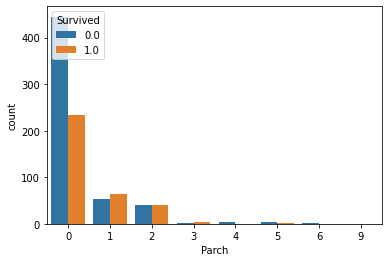

In [57]:
colunas(titanic_completo, 'Parch')

In [58]:
#parch tbém está relacionado com relações familiares: Parente = mãe, pai Child = filha, filho, enteada, enteado
#valores nulos;
#com existencia de 8 valores únicos, variando de: 0 a 9
#sendo a maioria, viajando sozinha, com o segundo maior grupo acompanhado por uma pessoa e , terceiro grupo, acompanhado por mais 2 pessoas
# que estava sozinho, tendeu a morrer.

Quantidade de valores nulos: 1
Valores únicos: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      15.05    39.      

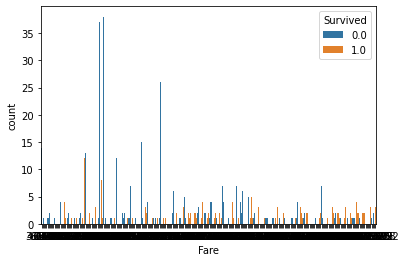

In [59]:
colunas(titanic_completo, 'Fare')

In [60]:
#fare é o valor pago pelo ticket
#existe apenas 1 valor nulo;
#com 281 valores únicos.

Quantidade de valores nulos: 2
Valores únicos: ['S' 'C' 'Q' nan]
Quantidade de valores únicos: 3
Proporção por valores únicos: S    914
C    270
Q    123
Name: Embarked, dtype: int64


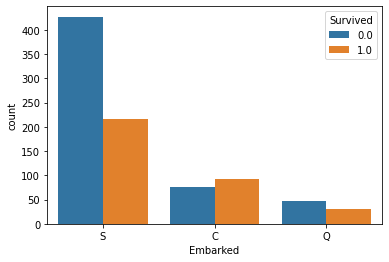

In [61]:
colunas(titanic_completo, 'Embarked')

In [62]:
#para local de embarque existem 2 valores nulos;
#com possibilidade de 3 respostas: S, C, Q
#Onde a maioria embarcou em S, seguida de longe por C e Q.

In [64]:
titanic_completo.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [65]:
#junto com os nomes existem títulos que cada um possuia, a ideia agora é separar esses titutlos dos nomes das pessoas.

In [67]:
titanic_completo['Titulo'] = titanic_completo['Name'].apply(lambda linha: linha.split(',')[1].split('.')[0].strip())

#titanic_df['Title'] = titanic_df['Name'].apply(lambda linha: linha.split(',')[1].split('.')[0].strip())

Quantidade de valores nulos: 0
Valores únicos: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']
Quantidade de valores únicos: 18
Proporção por valores únicos: Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Titulo, dtype: int64


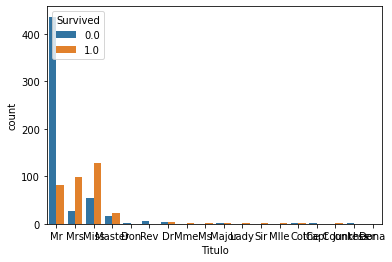

In [68]:
colunas(titanic_completo, 'Titulo')

In [70]:
#com a criação de uma nova coluna para auxiliar na predição, constata-se:
#sem valores nulos. 
#18 valores únicos.
#sendo os mais frequentes: mr, miss e mrs
#segundo o gráfico, a maioria das mortes foram para Mr.

In [71]:
titanic_completo.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [74]:
titanic_completo.corr(method = 'pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [76]:
titanic_completo.corr(method = 'spearman')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.039921,0.026822,-0.032295,-0.006191,-0.003583
Survived,-0.005007,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736
Pclass,-0.039921,-0.339668,1.000000,-0.395892,-0.066679,-0.028752,-0.709019
Age,0.026822,-0.052565,-0.395892,1.000000,-0.129929,-0.216097,0.192676
SibSp,-0.032295,0.088879,-0.066679,-0.129929,1.000000,0.438373,0.445566
Parch,-0.006191,0.138266,-0.028752,-0.216097,0.438373,1.000000,0.400301
Fare,-0.003583,0.323736,-0.709019,0.192676,0.445566,0.400301,1.000000


In [79]:
#segundo vi, não é muito bom efetuar as correções dos valores nulos antes da fase de split
#dessa forma, repassarei para a fase de pre-processamento

In [80]:
#https://portaldatascience.com/como-lidar-com-valores-faltantes-missing/

In [78]:
from sklearn.model_selection import train_test_split